In [ ]:
# CBIO313 – Machine Learning and Data Mining
# Final Project: Student Depression Prediction
# Author: Habiba Khaled Gaber
# Dataset: student_depression_dataset.csv

In [4]:
# Step 1: Importing Libraries and Loading the Dataset
# -------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Load the dataset
#Load Dataset
df = pd.read_csv('student_depression_dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [6]:
#EDA
df.info()
df.describe()
#missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

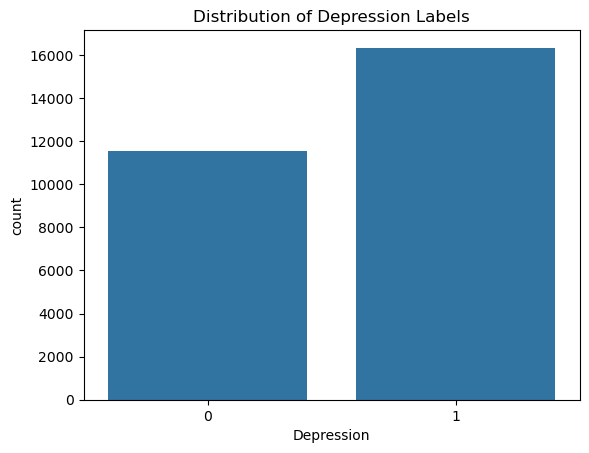

In [8]:
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression Labels')
plt.show()

In [10]:
#Handle missing values (drop or fill)
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Drop rows with missing values (or handle them as needed)
df.dropna(inplace=True)

Missing values per column:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [14]:
# List of categorical columns to one-hot encode
categorical_cols = [
    'Gender',
    'City',
    'Profession',
    'Study Satisfaction',
    'Job Satisfaction',
    'Sleep Duration',
    'Dietary Habits',
    'Degree',
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness'
]

In [16]:
# encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Show resulting dataframe
print(df_encoded.head())

   id   Age  Academic Pressure  Work Pressure  CGPA  Work/Study Hours  \
0   2  33.0                5.0            0.0  8.97               3.0   
1   8  24.0                2.0            0.0  5.90               3.0   
2  26  31.0                3.0            0.0  7.03               9.0   
3  30  28.0                3.0            0.0  5.59               4.0   
4  32  25.0                4.0            0.0  8.13               1.0   

  Financial Stress  Depression  Gender_Male  City_'Less than 5 Kalyan'  ...  \
0              1.0           1         True                      False  ...   
1              2.0           0        False                      False  ...   
2              1.0           0         True                      False  ...   
3              5.0           1        False                      False  ...   
4              1.0           0        False                      False  ...   

   Degree_MBBS  Degree_MCA  Degree_MD  Degree_ME  Degree_MHM  Degree_MSc  \
0        F

In [18]:
#sleep duration
sleep_mapping = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
}
df['Sleep Duration'] = df['Sleep Duration'].str.replace("'", "").map(sleep_mapping)

In [20]:
#Dietary Habits
diet_mapping = {
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2
}
df['Dietary Habits'] = df['Dietary Habits'].map(diet_mapping)

In [22]:
#remaining columns
nominal_cols = [
    'Gender',
    'City',
    'Profession',
    'Degree',
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness'
]

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [24]:
print(df.head())

   id   Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0   2  33.0                5.0            0.0  8.97                 2.0   
1   8  24.0                2.0            0.0  5.90                 5.0   
2  26  31.0                3.0            0.0  7.03                 5.0   
3  30  28.0                3.0            0.0  5.59                 2.0   
4  32  25.0                4.0            0.0  8.13                 3.0   

   Job Satisfaction  Sleep Duration  Dietary Habits  Work/Study Hours  ...  \
0               0.0             1.0             2.0               3.0  ...   
1               0.0             1.0             1.0               3.0  ...   
2               0.0             0.0             2.0               9.0  ...   
3               0.0             2.0             1.0               4.0  ...   
4               0.0             1.0             1.0               1.0  ...   

  Degree_MBBS  Degree_MCA  Degree_MD  Degree_ME  Degree_MHM  Degree_MSc  \
0    

In [26]:
# Data Splitting
X = df.drop("Depression", axis=1)
y = df["Depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (22320, 105)
Testing set size: (5581, 105)


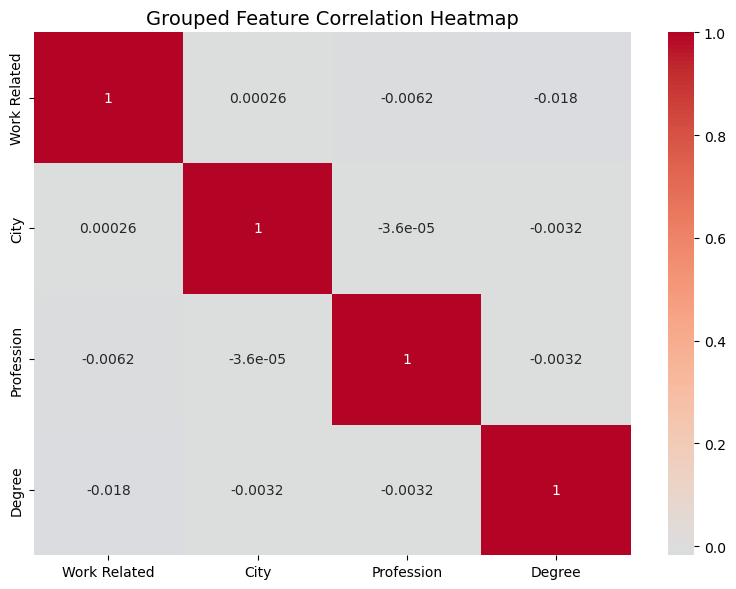

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define logical groupings of related columns
groupings = {
    "Work Related": ["Work Pressure", "Job Satisfaction", "Work/Study Hours"],
    "City": [col for col in df.columns if col.startswith("City_")],
    "Profession": [col for col in df.columns if col.startswith("Profession_")],
    "Degree": [col for col in df.columns if col.startswith("Degree_")]
}

# 2. Create a new DataFrame that contains the average value for each group
group_avg_df = pd.DataFrame()

for group_name, columns in groupings.items():
    group_avg_df[group_name] = df[columns].mean(axis=1)

# 3. Plot a correlation heatmap for the grouped features
plt.figure(figsize=(8, 6))
sns.heatmap(group_avg_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Grouped Feature Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
univariate plots.

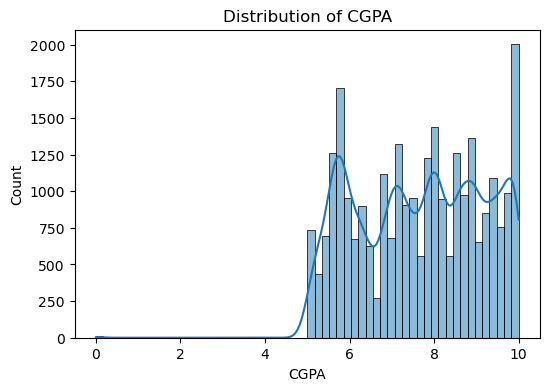

In [32]:
# Univariate Analysis
# -------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of CGPA
plt.figure(figsize=(6,4))
sns.histplot(df['CGPA'], kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.show()

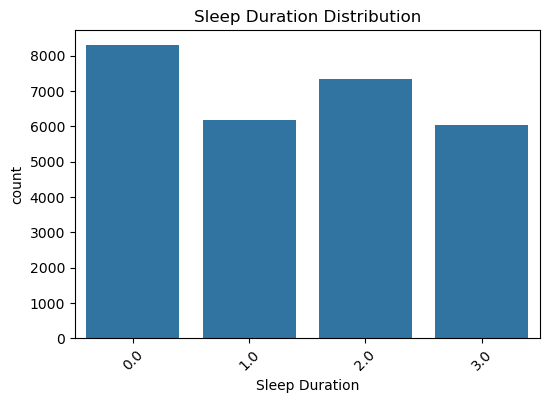

In [34]:
# Plot distribution of Sleep Duration
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sleep Duration')
plt.title('Sleep Duration Distribution')
plt.xticks(rotation=45)
plt.show()

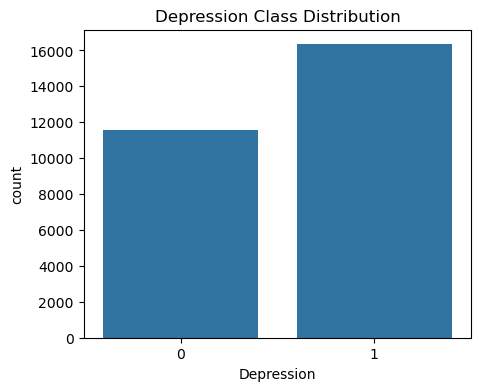

In [36]:
# Plot Depression target variable
plt.figure(figsize=(5,4))
sns.countplot(x='Depression', data=df)
plt.title('Depression Class Distribution')
plt.show()

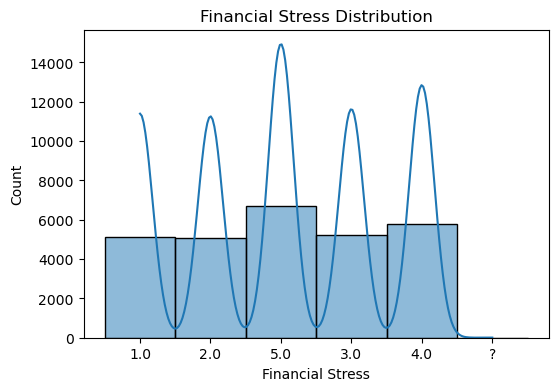

In [38]:
# Plot Financial Stress
plt.figure(figsize=(6,4))
sns.histplot(df['Financial Stress'], bins=5, kde=True)
plt.title('Financial Stress Distribution')
plt.show()

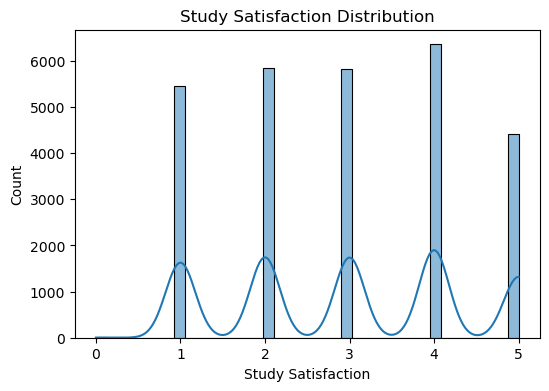

In [40]:
# Plot Study Satisfaction
plt.figure(figsize=(6,4))
sns.histplot(df['Study Satisfaction'], kde=True)
plt.title('Study Satisfaction Distribution')
plt.show()

In [ ]:
bivariate plots

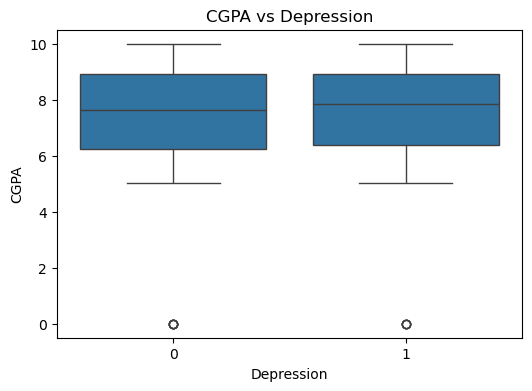

In [44]:
# CGPA vs Depression
plt.figure(figsize=(6,4))
sns.boxplot(x='Depression', y='CGPA', data=df)
plt.title('CGPA vs Depression')
plt.show()

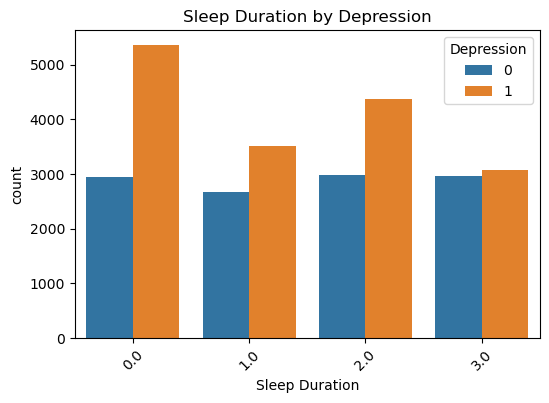

In [46]:
# Sleep Duration vs Depression
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sleep Duration', hue='Depression')
plt.title('Sleep Duration by Depression')
plt.xticks(rotation=45)
plt.show()

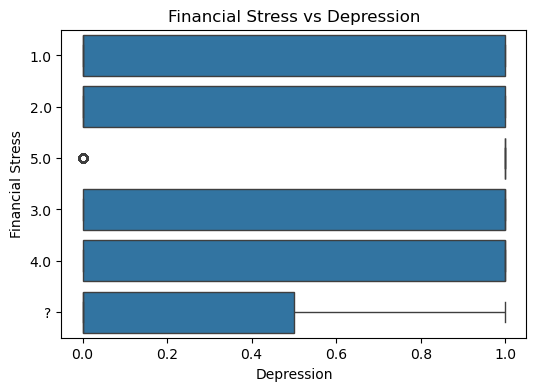

In [48]:
# Financial Stress vs Depression
plt.figure(figsize=(6,4))
sns.boxplot(x='Depression', y='Financial Stress', data=df)
plt.title('Financial Stress vs Depression')
plt.show()

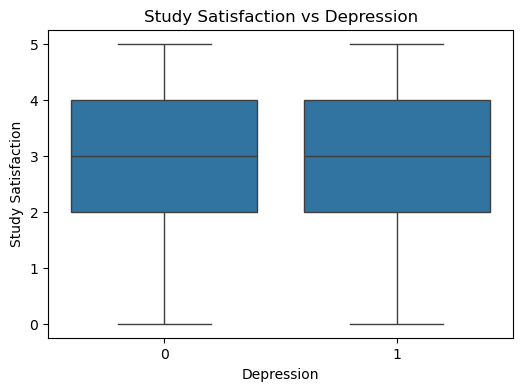

In [50]:
# Study Satisfaction vs Depression
plt.figure(figsize=(6,4))
sns.boxplot(x='Depression', y='Study Satisfaction', data=df)
plt.title('Study Satisfaction vs Depression')
plt.show()

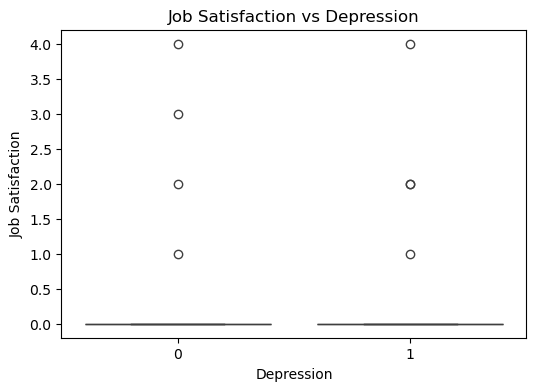

In [52]:
# Job Satisfaction vs Depression
plt.figure(figsize=(6,4))
sns.boxplot(x='Depression', y='Job Satisfaction', data=df)
plt.title('Job Satisfaction vs Depression')
plt.show()

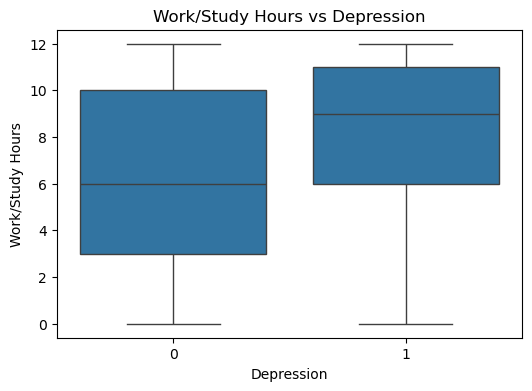

In [54]:
# Work/Study Hours vs Depression
plt.figure(figsize=(6,4))
sns.boxplot(x='Depression', y='Work/Study Hours', data=df)
plt.title('Work/Study Hours vs Depression')
plt.show()

In [ ]:
Feature Engineering and Selection

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Ensure all columns are numeric
X_train_numeric = X_train.select_dtypes(include=['number'])

# Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)

# Apply feature selection
selector = SelectKBest(score_func=f_classif, k=min(5, X_train_numeric.shape[1]))  # Avoid selecting more features than available
X_selected = selector.fit_transform(X_train_imputed, y_train)

# Get selected feature names
selected_features = X_train_numeric.columns[selector.get_support()]

print("Selected Features:", list(selected_features))

Selected Features: ['Age', 'Academic Pressure', 'Study Satisfaction', 'Dietary Habits', 'Work/Study Hours']


In [62]:
# Split the dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Replace '?' with np.nan
X_train = X_train.replace('?', np.nan)
X_test = X_test.replace('?', np.nan)  # if you have test data

# Convert all columns to numeric if applicable
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Impute missing values with mean or median (you can choose strategy)
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [74]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and fit the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on the test set
y_pred_log = log_model.predict(X_test)

# Evaluation
print("Logistic Regression - Confusion Matrix")
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print(conf_matrix_log)

print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_log))

Logistic Regression - Confusion Matrix
[[2742  763]
 [ 586 4280]]
Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3505
           1       0.85      0.88      0.86      4866

    accuracy                           0.84      8371
   macro avg       0.84      0.83      0.83      8371
weighted avg       0.84      0.84      0.84      8371



C:\Users\DAN TECH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest - Confusion Matrix")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))


Random Forest - Confusion Matrix
[[2737  768]
 [ 598 4268]]
Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3505
           1       0.85      0.88      0.86      4866

    accuracy                           0.84      8371
   macro avg       0.83      0.83      0.83      8371
weighted avg       0.84      0.84      0.84      8371



In [78]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Initialize and fit the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("Naive Bayes - Confusion Matrix")
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(conf_matrix_nb)

print("Naive Bayes - Classification Report")
print(classification_report(y_test, y_pred_nb))


Naive Bayes - Confusion Matrix
[[2288 1217]
 [ 488 4378]]
Naive Bayes - Classification Report
              precision    recall  f1-score   support

           0       0.82      0.65      0.73      3505
           1       0.78      0.90      0.84      4866

    accuracy                           0.80      8371
   macro avg       0.80      0.78      0.78      8371
weighted avg       0.80      0.80      0.79      8371



In [80]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

# Initialize and fit the model
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM - Confusion Matrix")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)

print("SVM - Classification Report")
print(classification_report(y_test, y_pred_svm))

SVM - Confusion Matrix
[[   0 3505]
 [   0 4866]]
SVM - Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3505
           1       0.58      1.00      0.74      4866

    accuracy                           0.58      8371
   macro avg       0.29      0.50      0.37      8371
weighted avg       0.34      0.58      0.43      8371



C:\Users\DAN TECH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DAN TECH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DAN TECH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
# XGBoost Classifier
from xgboost import XGBClassifier

# Initialize and fit the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost - Confusion Matrix")
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(conf_matrix_xgb)

print("XGBoost - Classification Report")
print(classification_report(y_test, y_pred_xgb))


C:\Users\DAN TECH\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:53:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Confusion Matrix
[[2741  764]
 [ 646 4220]]
XGBoost - Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3505
           1       0.85      0.87      0.86      4866

    accuracy                           0.83      8371
   macro avg       0.83      0.82      0.83      8371
weighted avg       0.83      0.83      0.83      8371



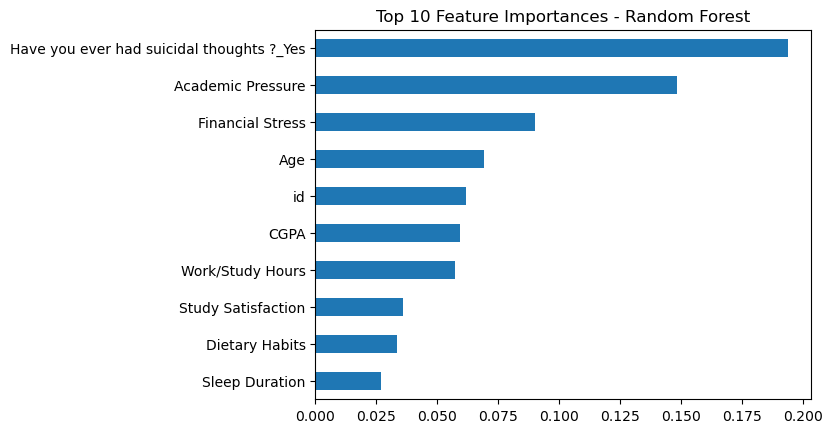

In [86]:
# Feature Importance - Random Forest
import pandas as pd

rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.gca().invert_yaxis()
plt.show()

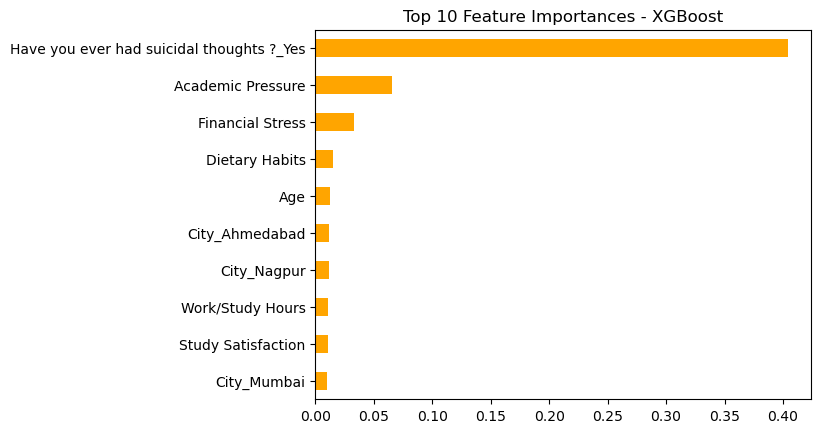

In [88]:
# Feature Importance - XGBoost
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_importances.nlargest(10).plot(kind='barh', color='orange')
plt.title("Top 10 Feature Importances - XGBoost")
plt.gca().invert_yaxis()
plt.show()

In [90]:
# Model Comparison Table
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Naive Bayes", "SVM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_xgb)
    ]
})

print(comparison.sort_values(by="F1-Score", ascending=False))

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.838848   0.848701  0.879573  0.863861
1        Random Forest  0.836818   0.847498  0.877106  0.862048
4              XGBoost  0.831561   0.846709  0.867242  0.856853
2          Naive Bayes  0.796321   0.782484  0.899712  0.837014
3                  SVM  0.581293   0.581293  1.000000  0.735212


C:\Users\DAN TECH\AppData\Local\Temp\ipykernel_26320\1668360041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison, x='Model', y='F1-Score', palette='viridis')


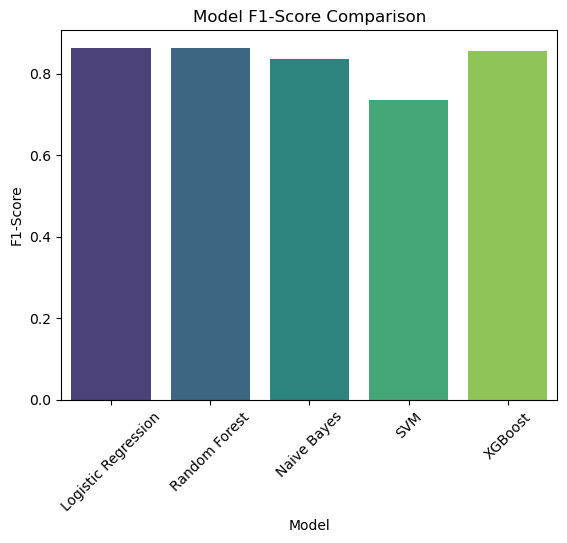

In [92]:
# Bar Plot of F1-Scores by Model
sns.barplot(data=comparison, x='Model', y='F1-Score', palette='viridis')
plt.xticks(rotation=45)
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")
plt.show()

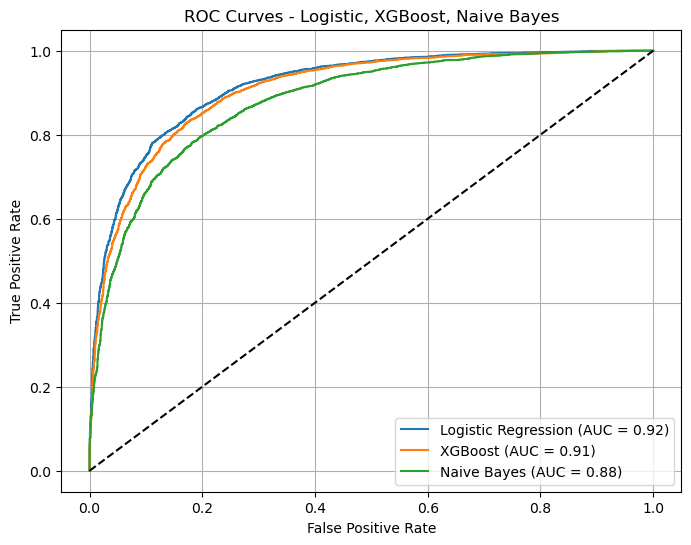

In [98]:
# AUC-ROC Curve - Logistic Regression, XGBoost, Naive Bayes
from sklearn.metrics import roc_curve, auc

# Logistic Regression
y_proba_log = log_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

# XGBoost
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Naive Bayes
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot all three curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Logistic, XGBoost, Naive Bayes")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [100]:
# Voting Classifier - Hard Voting
from sklearn.ensemble import VotingClassifier

# Combine Logistic Regression, Random Forest, and XGBoost
voting_model = VotingClassifier(
    estimators=[
        ('lr', log_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='hard'
)

# Train the ensemble model
voting_model.fit(X_train, y_train)

# Predict with the voting model
y_pred_vote = voting_model.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("Voting Classifier - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_vote))

print("\nVoting Classifier - Classification Report")
print(classification_report(y_test, y_pred_vote))

C:\Users\DAN TECH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DAN TECH\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:54:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Voting Classifier - Confusion Matrix
[[2753  752]
 [ 579 4287]]

Voting Classifier - Classification Report
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      3505
           1       0.85      0.88      0.87      4866

    accuracy                           0.84      8371
   macro avg       0.84      0.83      0.84      8371
weighted avg       0.84      0.84      0.84      8371



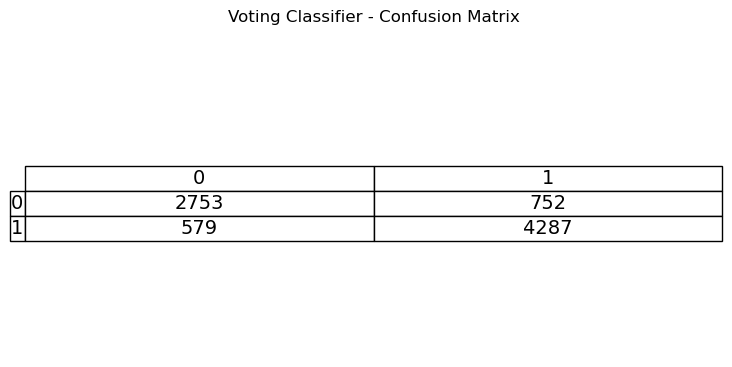

In [120]:
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = np.array([[2753, 752],
                        [579, 4287]])
labels = ['0', '1']

fig, ax = plt.subplots(figsize=(6, 4))  # <-- This defines ax
ax.axis('off')  # Hide axes

table = ax.table(cellText=conf_matrix,
                 rowLabels=labels,
                 colLabels=labels,
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)

plt.title("Voting Classifier - Confusion Matrix", pad=20)
plt.show()